# Overview

This project explores the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.es exploratory data analysis to generate insights for a business stakeholder

# Reading the title_basics dataset

In [44]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#using pandas to load the dataset
house_data = pd.read_csv('./data/kc_house_data.csv')

In [48]:
# inspecting contents of the dataframe 
house_data.head(20)

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   7129300520   221900.0         3       1.00         1180      5650     1.0   
1   6414100192   538000.0         3       2.25         2570      7242     2.0   
2   5631500400   180000.0         2       1.00          770     10000     1.0   
3   2487200875   604000.0         4       3.00         1960      5000     1.0   
4   1954400510   510000.0         3       2.00         1680      8080     1.0   
5   7237550310  1230000.0         4       4.50         5420    101930     1.0   
6   1321400060   257500.0         3       2.25         1715      6819     2.0   
7   2008000270   291850.0         3       1.50         1060      9711     1.0   
8   2414600126   229500.0         3       1.00         1780      7470     1.0   
9   3793500160   323000.0         3       2.50         1890      6560     2.0   
10  1736800520   662500.0         3       2.50         3560      9796     1.0   
11  9212900260   468000.0         2       1.00         1160      6000     1.0   
12   114101516   310000.0         3       1.00         1430     19901     1.5   
13  6054650070   400000.0         3       1.75         1370      9680     1.0   
14  1175000570   530000.0         5       2.00         1810      4850     1.5   
15  9297300055   650000.0         4       3.00         2950      5000     2.0   
16  1875500060   395000.0         3       2.00         1890     14040     2.0   
17  6865200140   485000.0         4       1.00         1600      4300     1.5   
18    16000397   189000.0         2       1.00         1200      9850     1.0   
19  7983200060   230000.0         3       1.00         1250      9774     1.0   

   waterfront  condition          grade  yr_built  
0          NO    Average      7 Average      1955  
1          NO    Average      7 Average      1951  
2          NO    Average  6 Low Average      1933  
3          NO  Very Good      7 Average      1965  
4          NO    Average         8 Good      1987  
5          NO    Average   11 Excellent      2001  
6          NO    Average      7 Average      1995  
7          NO    Average      7 Average      1963  
8          NO    Average      7 Average      1960  
9          NO    Average      7 Average      2003  
10         NO    Average         8 Good      1965  
11         NO       Good      7 Average      1942  
12         NO       Good      7 Average      1927  
13         NO       Good      7 Average      1977  
14         NO    Average      7 Average      1900  
15         NO    Average       9 Better      1979  
16         NO    Average      7 Average      1994  
17         NO       Good      7 Average      1916  
18         NO       Good      7 Average      1921  
19         NO       Good      7 Average      1969

In [16]:
#Dropping columns

columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement','yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']  # List of column names to drop

house_data.drop(columns=columns_to_drop, inplace=True)

In [17]:
#getting a summary of the dataframe
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


# cleaning the  dataset


In [24]:
# Check if there are any missing values in the DataFrame
# Count missing values in each column
missing_counts = house_data.isnull().sum()
missing_counts


id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [30]:
#from the above we see the column waterfront missing 2376 values, going with the assumption that the NaN values represent
#properties with no waterfronts then we fill them with NO

house_data['waterfront'].fillna('NO', inplace=True)

# Analysis
We want to now visualize the above information by plotting a bar graph of the top graded houses,their conditions and their prices

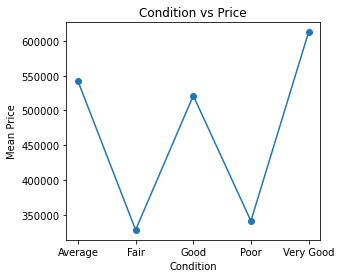

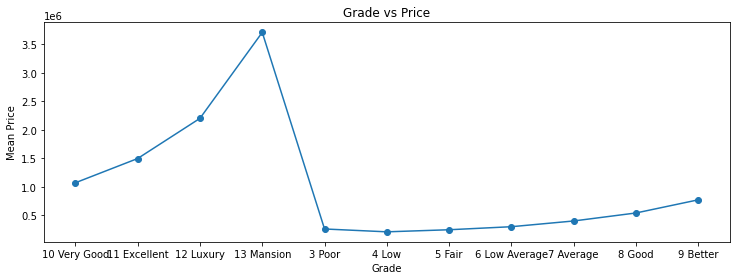

In [58]:
condition_group = house_data.groupby("condition")["price"].mean()

# Group the data by "grade" and calculate the mean price for each grade
grade_group = house_data.groupby("grade")["price"].mean()

# Create a line graph for "condition" vs "price"
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(condition_group.index, condition_group.values, marker='o', linestyle='-')
plt.xlabel("Condition")
plt.ylabel("Mean Price")
plt.title("Condition vs Price")

# Create a line graph for "grade" vs "price"
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(grade_group.index, grade_group.values, marker='o', linestyle='-')
plt.xlabel("Grade")
plt.ylabel("Mean Price")
plt.title("Grade vs Price")

# Display the plot
plt.tight_layout()
plt.show()


we can see the better the condition of the house, the higher the mean price and the design of the 
houses greatly influence the prices